## **About Dataset**
## Introduction
This dataset contains the top 100 richest people in the world based on their net worth. The dataset includes their rank, name, net worth, birthday, age, and nationality.

## Methodology
This dataset was collected using web scraping (Beautiful Soup) on this website and this wikipedia

## **Table of content**

1.  Library
2.  Import Data
3.  Data Summary
4.  Exploratory Data Analysis
*  Nationality Distribution
*  Top 10 Richest Nationality
*  Age and Generation Distribution
*  Month Distribution
*  Top 25 Richest - Birth of Month
*  Day Distribution
*  Word Length Distribution
5.  BONUS
6.  Reference


## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#remove warning texts
import pandas as pd
pd.options.mode.chained_assignment = None

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [ ]:
df=pd.read_csv('/content/top_100_richest.csv')

## Data Summary

In [ ]:
df.head()

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   name         100 non-null    object 
 2   net_worth    100 non-null    object 
 3   bday         94 non-null     object 
 4   age          95 non-null     float64
 5   nationality  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are two missing values


*   birthday = 94/100
*   age = 95/100



In [ ]:
df.bday.isnull().sum()

6

In [ ]:
df[df.bday.isnull()]

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France
20,21,Zhong Shanshan,$68 Billion,NaN,NaN,China
65,66,Qin Yinglin,$22 Billion,NaN,57.0,China
67,68,Wang Wei,$22 Billion,NaN,51.0,China
87,88,David & Simon Reuben,$18 Billion,NaN,NaN,United Kingdom
90,91,Lukas Walton,$18 Billion,NaN,36.0,United States of America


As Qin is 57, Wang is and Lukas is 36, we're filling up the missing "bday" attribute by year.

In [ ]:
df.bday = [2022-df.age[index] if str(bday)=='nan' else bday for index,bday in enumerate(df.bday)]

In [ ]:
df[df.bday.isnull()]

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France
20,21,Zhong Shanshan,$68 Billion,NaN,NaN,China
87,88,David & Simon Reuben,$18 Billion,NaN,NaN,United Kingdom


Since both bday and age attributes are missing, we can not fill any of them. As missings have just three person, we can search on Google them.

In [ ]:
missing_index = [10,20,87]
missing_bday = ['28-Sep-48','1-Dec-54','14-Sep-38']
missing_age = [74,68,84]

for index,value in enumerate(missing_index):
    df.bday[value] = missing_bday[index]
    df.age[value]= missing_age[index]

In [ ]:
df[df.name=='Zhong Shanshan']

,rank,name,net_worth,bday,age,nationality
20,21,Zhong Shanshan,$68 Billion,1-Dec-54,68.0,China


## **Exploratory Data Analysis (EDA)**
* Nationality Distribution
*  Year and Age Distribution
*  Generation Distribution
*  Month Distribution
*  Day Distribution
*  Word Length Distribution

## Nationality Distribution

In [ ]:
national_sizes = df.nationality.value_counts().tolist()
national_labels = []
none = [national_labels.append(i[0]) for i in df.nationality.value_counts().items()]

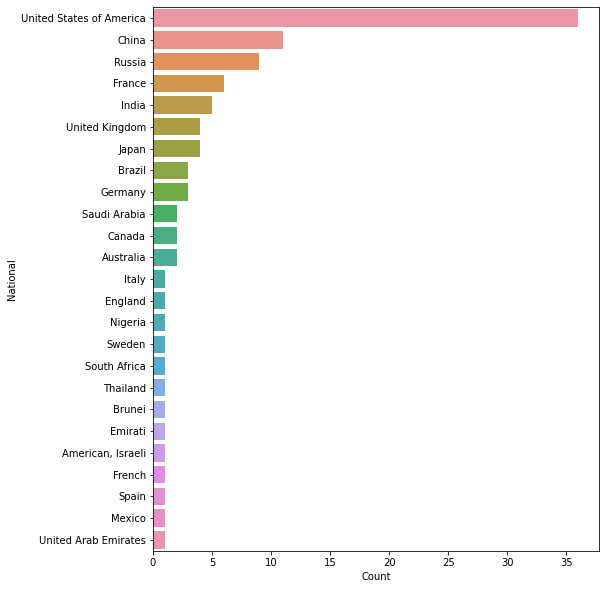

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x=national_sizes,y=national_labels)
plt.xlabel('Count')
plt.ylabel('National')
plt.show()

In [ ]:
def pie_chart(sizes,labels,level):
    
    explode = [0.1]
    for i in range(level):
        explode.append(0)
    explode = tuple(explode)
    
    fig1, ax1 = plt.subplots(figsize=(15, 8))
    ax1.pie(sizes, 
            explode=explode,
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90)
    ax1.axis('equal')  
    plt.show()

## Top 10 Nationality

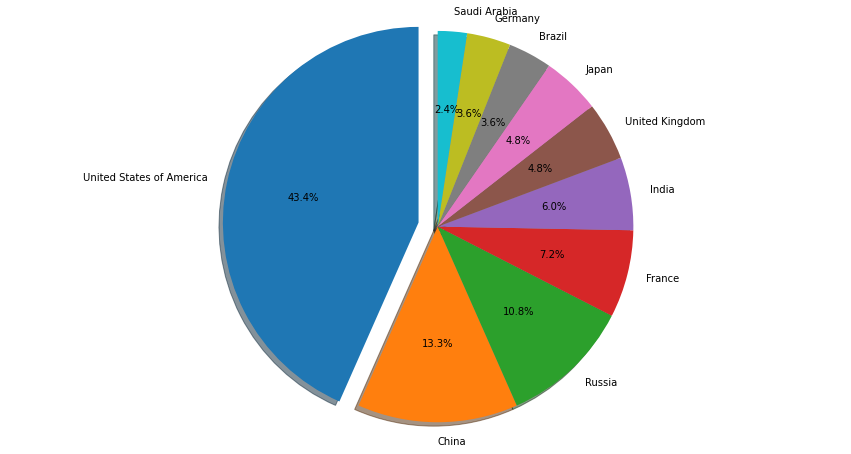

In [ ]:
pie_chart(national_sizes[:10],national_labels[:10],level=9)

## Age and Year Distribution

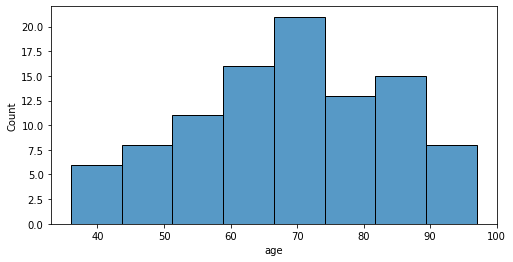

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x=df.age)
plt.show()

In [ ]:
df['generation']=['WWII'if i >94 
                    else 'Post War' if i>76 
                    else 'Boomers I' if i>67 
                    else 'Boomers II' if i>57 
                    else 'Gen X' if i>41 
                    else 'Gen Y' for i in df.age]

In [ ]:
gen_sizes = df.generation.value_counts().tolist()
gen_labels = []
none = [gen_labels.append(i[0]) for i in df.generation.value_counts().items()]

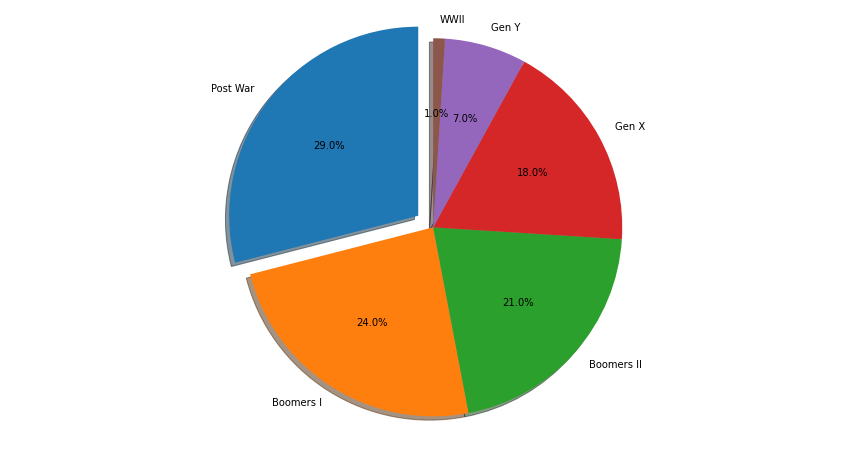

In [ ]:
pie_chart(gen_sizes,gen_labels,5)

## Month Distribution

* While we extract the months from "bday", got an error/exception.
* We realised that three bussiness man have no birthday and month informations. Thus, we googled them, but did not find what we searched.



In [ ]:
for index,value in enumerate(df.bday):
    if type(value)!=str:
        df.bday[index]='1-Jan-'+str(value)[2:4]

In [ ]:
day_list, month_list = [],[]

for i in df.bday:
    month_list.append(i[3:6]) if len(i) == 9 else month_list.append(i[2:5])
    day_list.append(i[0:2]) if len(i) == 9 else day_list.append(i[0:1])

df['month']=pd.DataFrame(month_list)
df['day']=pd.DataFrame(day_list)

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['month_sort']=['(A)-Jan' if i=='Jan' 
                    else '(B)-Feb' if i=='Feb' 
                    else '(C)-Mar' if i=='Mar' 
                    else '(D)-Apr' if i=='Apr' 
                    else '(E)-May' if i=='May' 
                    else '(F)-Jun' if i=='Jun' 
                    else '(G)-Jul' if i=='Jul' 
                    else '(H)-Aug' if i=='Aug' 
                    else '(I)-Sep' if i=='Sep' 
                    else '(J)-Oct' if i=='Oct' 
                    else '(K)-Nov' if i=='Nov'
                    else '(L)-Dec' for i in df.month]

In [ ]:
df_copy = df_copy.sort_values(by=['month_sort'],ascending=True)

In [ ]:
df.head()

,rank,name,net_worth,bday,age,nationality,month,day
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,Jun,28
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,Jan,12
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,Jun,24
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,Mar,5
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,Oct,28


In [ ]:
month_sizes = df_copy.month_sort.value_counts(sort=False).tolist()
month_labels = []
none = [month_labels.append(i[0]) for i in df_copy.month_sort.value_counts(sort=False).items()]

In [ ]:
def bar_plot(sizes,labels,title):
    fig, ax = plt.subplots(figsize=(14, 4))

    #plt.xticks(rotation=90)
    ax.bar(labels, sizes)

    ax.set_ylabel('Count')
    ax.set_title(title)

    plt.show()

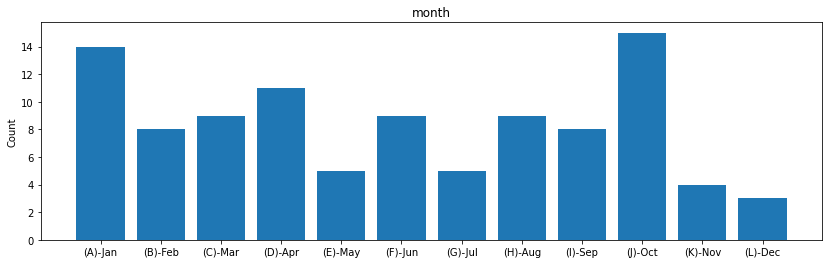

In [ ]:
#month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bar_plot(month_sizes,month_labels,'month')

* If you were born in January, April, or October, you can be a billionare.
* But we can not the same for November and December children. The probability to be billionare is less likely for them.

## Top 25 Richest- Month of Birth

In [ ]:
month_sizes = df.month.value_counts(sort=True).tolist()
month_labels = []
none = [month_labels.append(i[0]) for i in df.month.value_counts(sort=True).items()]

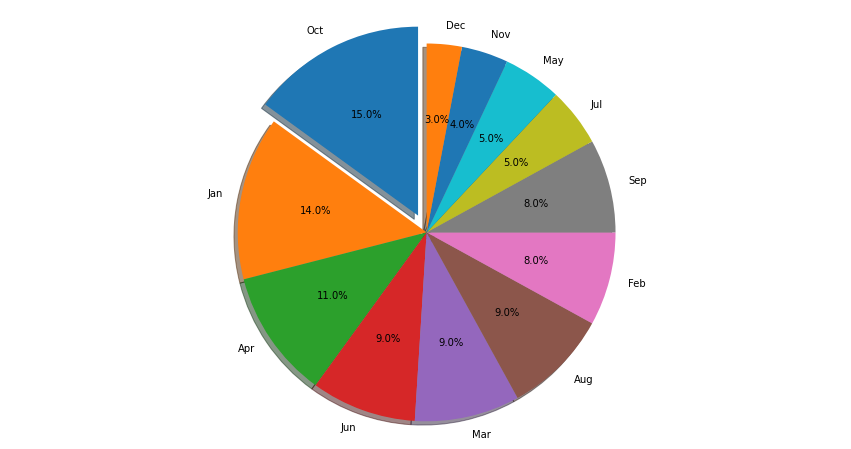

In [ ]:
pie_chart(month_sizes,month_labels,11)

## Day Distribution 

In [ ]:
df.head()

,rank,name,net_worth,bday,age,nationality,month,day
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,Jun,28
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,Jan,12
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,Jun,24
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,Mar,5
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,Oct,28


In [ ]:
day_sizes = df.day.value_counts(sort=True).tolist()
day_labels = []
none = [day_labels.append(i[0]) for i in df.day.value_counts(sort=True).items()]

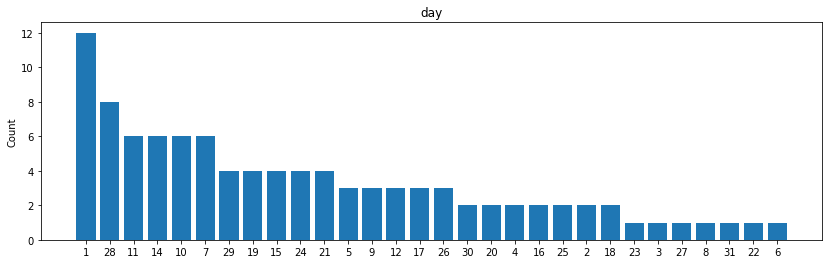

In [ ]:
bar_plot(day_sizes,day_labels,'day')

## Letter and Word Distribution

In [ ]:
df['length'] = [len(i) for i in df.name]

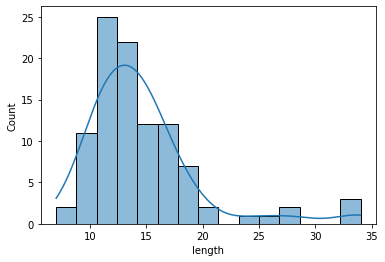

In [ ]:
sns.histplot(data=df,x='length',kde=True)
plt.show()

## Bonus

In [ ]:
worth_list = []

for i in df.net_worth:
    worth_list.append(int(i[1:4])) if len(i) == 12 else worth_list.append(int(i[1:3]))
    
df['worth']=pd.DataFrame(worth_list)

In [ ]:
TOTAL_WORTH = df.worth.sum()

In [ ]:
TOTAL_WORTH 

4269

##Total Worth is 4.269 Billion Dollar

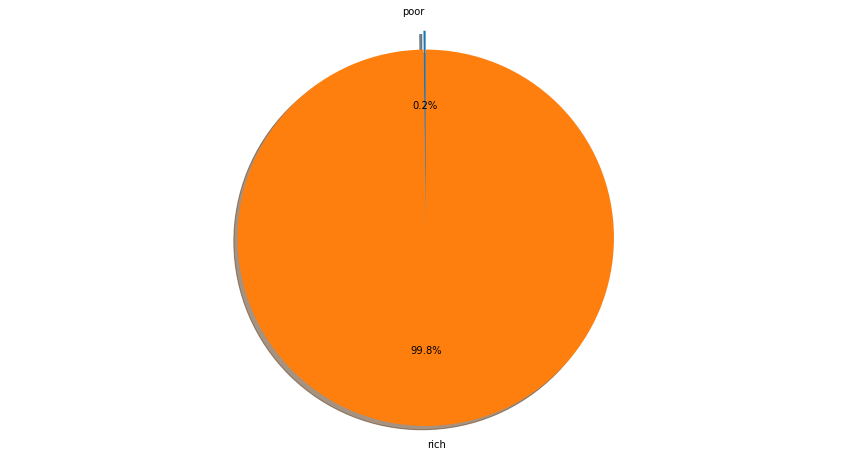

In [ ]:
money = [8000000000,4269000000000]
label = ['poor','rich']


pie_chart(money,label,1)

World poverty problem can be solved with 2 per thousand of this money

## References

* Ref-1 | Birthday of Alain Wertheimer : September, 28th, 1948 (https://www.bloomberg.com/billionaires/profiles/alain-e-wertheimer/).
* Ref-2 | Birthday of Gerrard Wertheimer : November, 11th, 1951 (https://www.bloomberg.com/billionaires/profiles/gerard-p-wertheimer/).
* Ref-3 | Birthday of Zhong Shanshan : December, 1st, 1954 (https://www.bloomberg.com/billionaires/profiles/shanshan-zhong/).
* Ref-4 | Birthday of David Reuben : September, 14th, 1938 (https://www.bloomberg.com/billionaires/profiles/david-reuben/).
* Ref-5 | Birthday of Simon Reuben : May, 5th, 1941 (https://www.bloomberg.com/billionaires/profiles/simon-reuben/).
* Ref-6 | Generations : WWII, Post War, Boomers I, Boomers II, Gen X, Gen Y (https://www.beresfordresearch.com/age-range-by-generation/).